Data size:  (500, 1)
Output size:  (500, 1)
X max: 0.9979209289222291


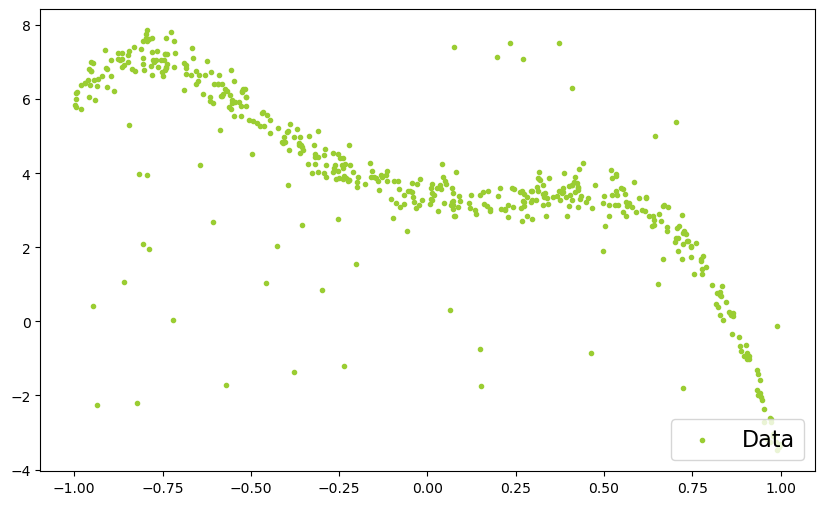

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16



# Assuming the data is saved as a tuple (X, y)
X, y = np.load("/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Assignment_1_IPB/data/e01_data.npy")

# Make sure the data is there
print('Data size: ', X.shape)
print('Output size: ', y.shape)
print ('X max:', X.max())
plt.scatter(X, y, color='yellowgreen', marker='.',label='Data')
plt.legend(loc='lower right')

In [37]:
from sklearn.model_selection import train_test_split

# Split the data in training, validation and test sets
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.1, random_state=7)

print('Max de X_train:', X_train.max())
print('# training samples: ', X_train.shape[0])
print('# validation samples: ', X_val.shape[0])
print('# test samples: ', X_test.shape[0])

Max de X_train: 0.9979209289222291
# training samples:  405
# validation samples:  45
# test samples:  50


MSE (validation set) linear model: 0.9780663914619004
R2 (validation set) linear model: 0.8408456893838135
Explained variance (validation set) linear model: 0.8411329213755582
Model coefficients:  [[-1.84984534]]


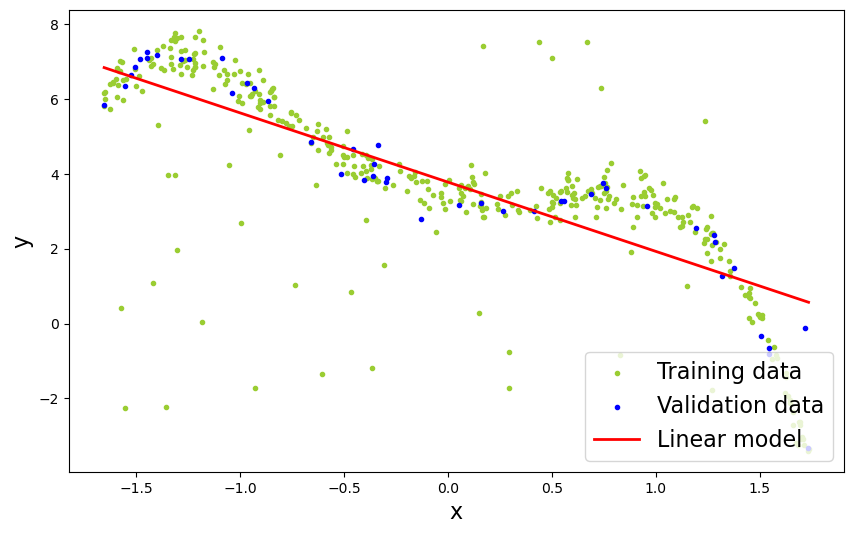

In [52]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score 
from sklearn.preprocessing import StandardScaler

# Scale the data. I will not descale it because I am not interested in the actual values of the coefficients
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = lr.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))
ev_val = explained_variance_score(y_val, y_val_predicted)
print('Explained variance (validation set) linear model: {}'.format(ev_val))
# Print the model coefficients
print('Model coefficients: ', lr.coef_)

# Use the model to generate data to plot
line_X_to_plot = np.linspace(X_train.min(), X_train.max(), 100)[:, np.newaxis]
line_y_to_plot = lr.predict(line_X_to_plot)


plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
plt.scatter(X_val, y_val, color='blue', marker='.',label='Validation data')
plt.plot(line_X_to_plot, line_y_to_plot, color='red', linewidth=2, label='Linear model')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

MSE (validation set): 4.014159401703337
R2 (validation set): 0.3468022438367728
Explained variance (validation set): 0.37789503000901326


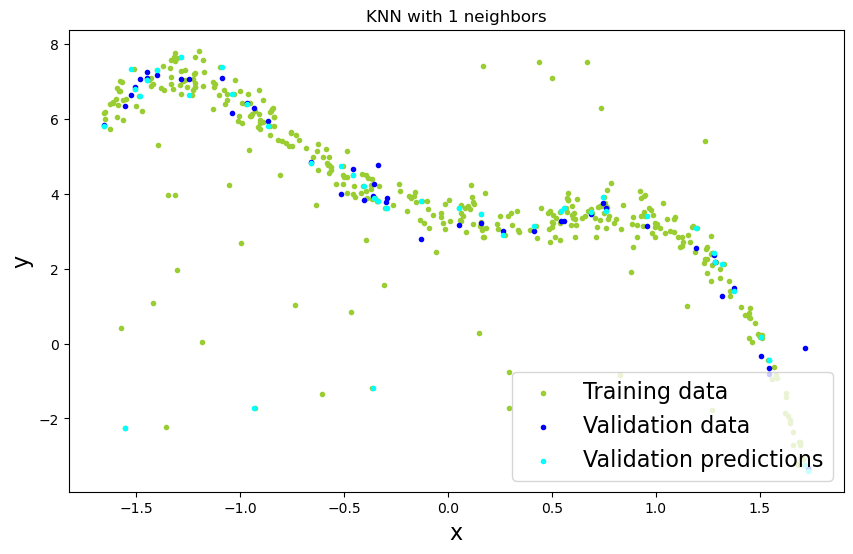

MSE (validation set): 0.7164959087564235
R2 (validation set): 0.8834093335453408
Explained variance (validation set): 0.8942199409257813


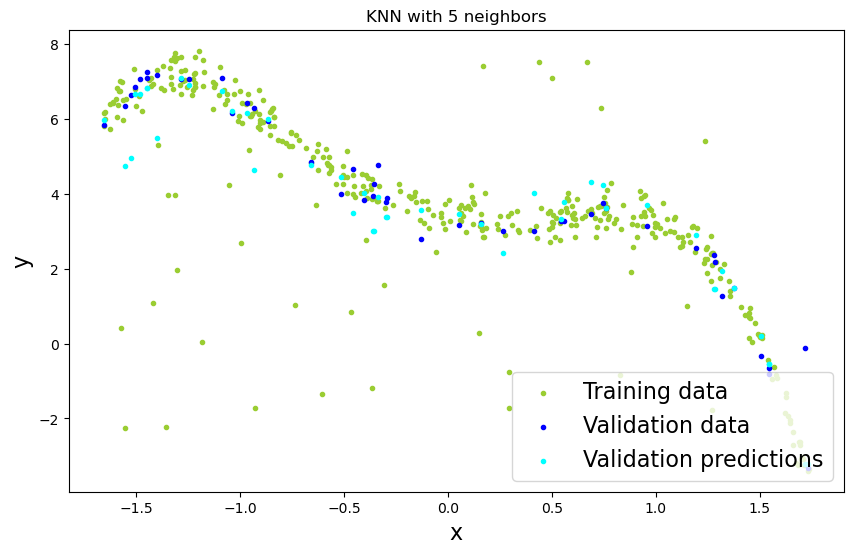

MSE (validation set): 0.6227162343729523
R2 (validation set): 0.8986694831186258
Explained variance (validation set): 0.912756362274347


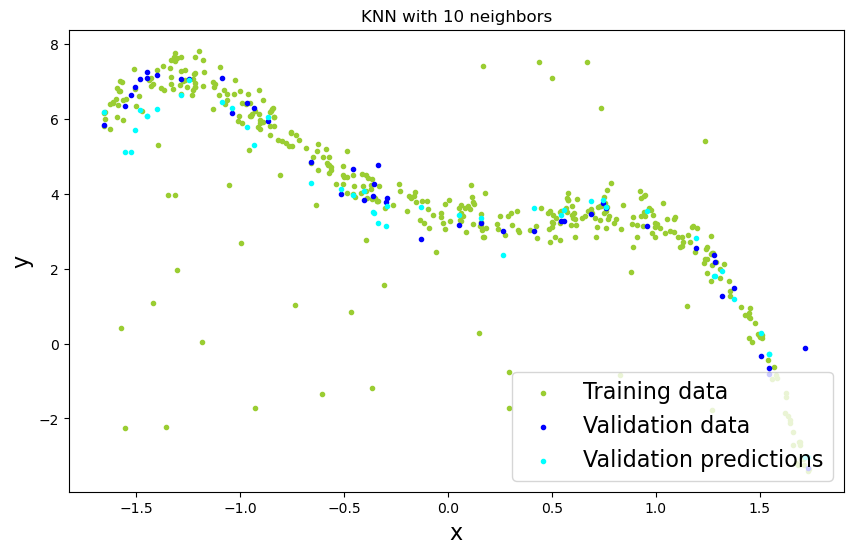

MSE (validation set): 0.5363872242428974
R2 (validation set): 0.912717235104961
Explained variance (validation set): 0.9232269774206826


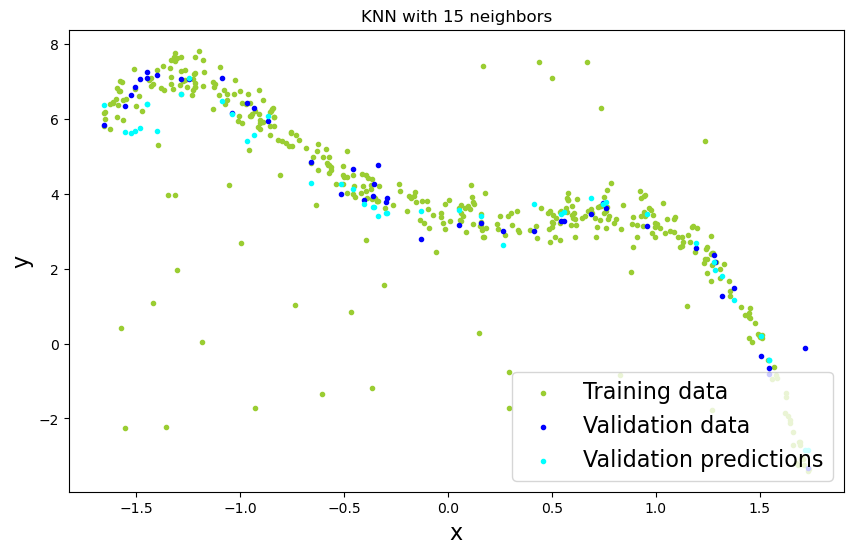

MSE (validation set): 0.5411250423482779
R2 (validation set): 0.9119462811278393
Explained variance (validation set): 0.9234950637199966


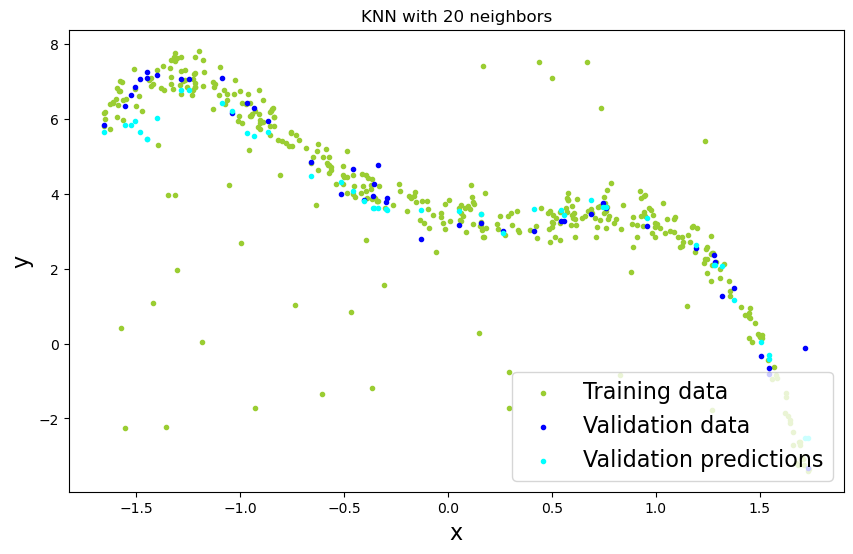

In [46]:
from sklearn import neighbors

# For several ks in knn
for n_neighbors in [1, 5, 10, 15,20]:
    
    # Fit a knn model
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    knn.fit(X_train, y_train)
    
    # Make predictions using the training and test data
    # y_train_predicted = knn.predict(X_train)
    y_val_predicted = knn.predict(X_val)
    # rmse_train = mean_squared_error(y_train, y_train_predicted)
    mse_val = mean_squared_error(y_val, y_val_predicted)
    
    # Plot the data and the model
    # print('MSE (training set): {}'.format(mse_train))
    print('MSE (validation set): {}'.format(mse_val))
    # Calculate R2 and explained variance
    # r2_train = r2_score(y_train, y_train_predicted)
    r2_val = r2_score(y_val, y_val_predicted)
    # ev_train = explained_variance_score(y_train, y_train_predicted)
    ev_val = explained_variance_score(y_val, y_val_predicted)
    # print('R2 (training set): {}'.format(r2_train))
    print('R2 (validation set): {}'.format(r2_val))
    # print('Explained variance (training set): {}'.format(ev_train))
    print('Explained variance (validation set): {}'.format(ev_val))
    

    plt.figure()
    plt.scatter(X_train, y_train, color='yellowgreen', marker='.', label='Training data')
    plt.scatter(X_val, y_val, color='blue', marker='.', label='Validation data')
    plt.scatter(X_val, y_val_predicted, color='cyan', marker='.', label='Validation predictions')
    plt.title(f'KNN with {n_neighbors} neighbors')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc='lower right')
    plt.show()

Linear model
MSE (validation set): 0.9780663914619004
R2 (validation set): 0.8408456893838135
Explained variance (validation set): 0.8411329213755582
Model coefficients:  [[-1.84984534]]
Huber model
MSE (validation set): 1.0588991882266936
R2 (validation set): 0.8276923000468688
Explained variance (validation set): 0.8367871367518066
Model coefficients:  [[-1.84984534]]
RANSAC model
MSE (validation set): 1.3400765956948149
R2 (validation set): 0.7819381499839602
Explained variance (validation set): 0.8209631379782079
Model coefficients:  [[-1.84984534]]


/Users/ignaciopastorebenaim/anaconda3/envs/CVISEnv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


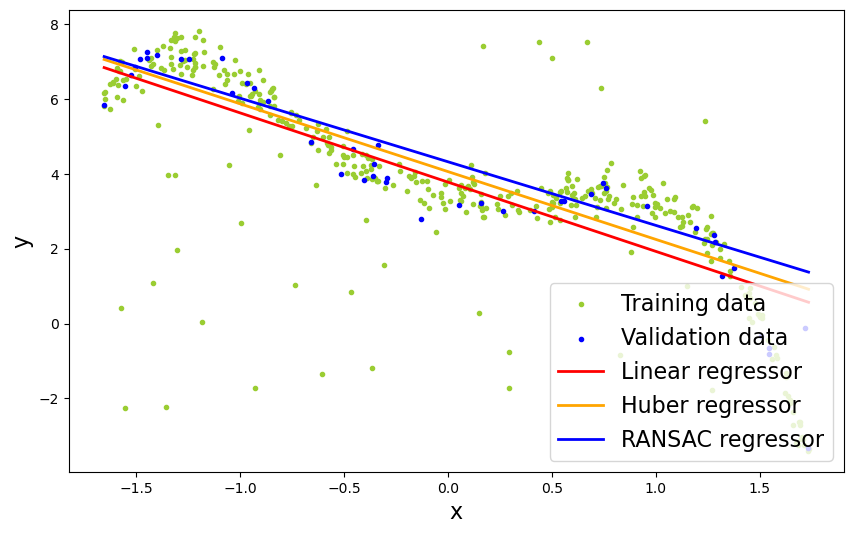

In [51]:
# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = lr.predict(X_val)
print('Linear model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))
ev_val = explained_variance_score(y_val, y_val_predicted)
print('Explained variance (validation set): {}'.format(ev_val))
# Print the model coefficients
print('Model coefficients: ', lr.coef_)

# Fit a Huber regression model
hu = linear_model.HuberRegressor()
hu.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = hu.predict(X_val)
print('Huber model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))
ev_val = explained_variance_score(y_val, y_val_predicted)
print('Explained variance (validation set): {}'.format(ev_val))
# Print the model coefficients
print('Model coefficients: ', lr.coef_)

# Fit a RANSAC regression model
ra = linear_model.RANSACRegressor()
ra.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = ra.predict(X_val)
print('RANSAC model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))
ev_val = explained_variance_score(y_val, y_val_predicted)
print('Explained variance (validation set): {}'.format(ev_val))
# Print the model coefficients
print('Model coefficients: ', lr.coef_)

# Use the model to generate data to plot
line_X_to_plot = np.linspace(X_train.min(), X_train.max(), 100)[:, np.newaxis]
line_y = lr.predict(line_X_to_plot)
line_y_huber = hu.predict(line_X_to_plot)
line_y_ransac = ra.predict(line_X_to_plot)

lw = 2
plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
plt.scatter(X_val, y_val, color='blue', marker='.', label='Validation data')
plt.plot(line_X_to_plot, line_y, color='red', linewidth=lw, label='Linear regressor')
plt.plot(line_X_to_plot, line_y_huber, color='orange', linewidth=lw, label='Huber regressor')
plt.plot(line_X_to_plot, line_y_ransac, color='blue', linewidth=lw, label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [55]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

degrees = [2,3,4,5,6,7,8,9,10,11,12]

for degree in degrees: 
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    print ('Polinomial degree:', degree)
    lr = linear_model.LinearRegression()
    lr.fit(X_poly, y_train)
    # Predict output for the validation data
    y_val_predicted = lr.predict(X_poly_val)
    print('Polynomial model with degree: ', degree)
    # Compute metrics in the validation data
    mse_val = mean_squared_error(y_val, y_val_predicted)
    print('MSE (validation set): {}'.format(mse_val))
    r2_val = r2_score(y_val, y_val_predicted)
    print('R2 (validation set): {}'.format(r2_val))
    ev_val = explained_variance_score(y_val, y_val_predicted)
    print('Explained variance (validation set): {}'.format(ev_val))
    # Print the model coefficients
    print('Model coefficients: ', lr.coef_)


    lamba_ridge_lasso = 1.0

    rr = linear_model.Ridge(alpha=lamba_ridge_lasso)
    rr.fit(X_poly, y_train)
    # Predict output for the validation data
    y_val_predicted = rr.predict(X_poly_val)
    print('Ridge model model with degree: ', degree)
    # Compute metrics in the validation data
    mse_val = mean_squared_error(y_val, y_val_predicted)
    print('MSE (validation set): {}'.format(mse_val))
    r2_val = r2_score(y_val, y_val_predicted)
    print('R2 (validation set): {}'.format(r2_val))
    ev_val = explained_variance_score(y_val, y_val_predicted)
    print('Explained variance (validation set): {}'.format(ev_val))
    # Print the model coefficients
    print('Model coefficients: ', lr.coef_)

    lasso = linear_model.Lasso(alpha=lamba_ridge_lasso)
    lasso.fit(X_poly, y_train)
    y_val_predicted = lasso.predict(X_poly_val)
    print('Lasso model model with degree: ', degree)
    # Compute metrics in the validation data
    mse_val = mean_squared_error(y_val, y_val_predicted)
    print('MSE (validation set): {}'.format(mse_val))
    r2_val = r2_score(y_val, y_val_predicted)
    print('R2 (validation set): {}'.format(r2_val))
    ev_val = explained_variance_score(y_val, y_val_predicted)
    print('Explained variance (validation set): {}'.format(ev_val))
    # Print the model coefficients
    print('Model coefficients: ', lr.coef_)

    # Use the model to generate data to plot
    linspace_X = np.linspace(X.min(), X.max(), num=100)[:, np.newaxis]
    linspace_X_poly = poly.fit_transform(linspace_X)
    linspace_y_lr = lr.predict(linspace_X_poly)
    linspace_y_rr = rr.predict(linspace_X_poly)
    linspace_y_lasso = lasso.predict(linspace_X_poly)

    #plot the data and the model
    plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
    plt.scatter(X_val, y_val, color='blue', marker='.', label='Validation data')
    plt.plot(linspace_X, linspace_y_lr, color='red', linewidth=2, label='Polynomial model')
    plt.plot(linspace_X, linspace_y_rr, color='orange', linewidth=2, label='Ridge model')
    plt.plot(linspace_X, linspace_y_lasso, color='blue', linewidth=2, label='Lasso model')
    plt.legend(loc='lower right')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f'Polynomial model with degree: {degree}')
    plt.show()

Polinomial degree: 2


ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.